In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

print("tf version :",tf.__version__)

tf version : 2.19.0


## MNIST Corrupted

In [7]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist_corrupted',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [8]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)


In [9]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)


In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)
type(ds_train)
model.fit(
    ds_train,
    epochs=1,
    validation_data=ds_test
)


/home/ornellah/Documents/Git project/TensorFlowModels/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-03-18 16:30:10.070329: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
I0000 00:00:1742311811.692394    6598 service.cc:152] XLA service 0x7b4090005560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742311811.692422    6598 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-03-18 16:30:11.743124: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REP

 49/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5132 - sparse_categorical_accuracy: 0.5822

I0000 00:00:1742311814.823755    6598 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6186 - sparse_categorical_accuracy: 0.8333

2025-03-18 16:30:17.879361: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_287', 88 bytes spill stores, 88 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.6148 - sparse_categorical_accuracy: 0.8343 - val_loss: 0.1958 - val_sparse_categorical_accuracy: 0.9436


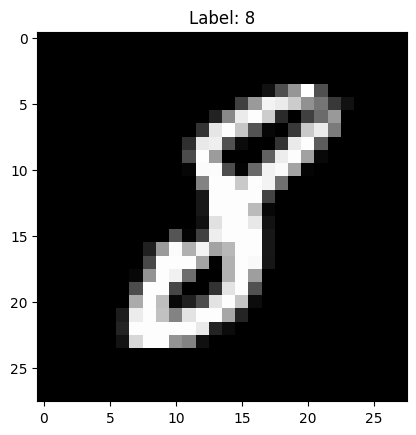

2025-03-18 16:30:21.935248: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
for batch_images, batch_labels in ds_train.take(1):

    image = batch_images[0]
    label = batch_labels[0]

    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.show()

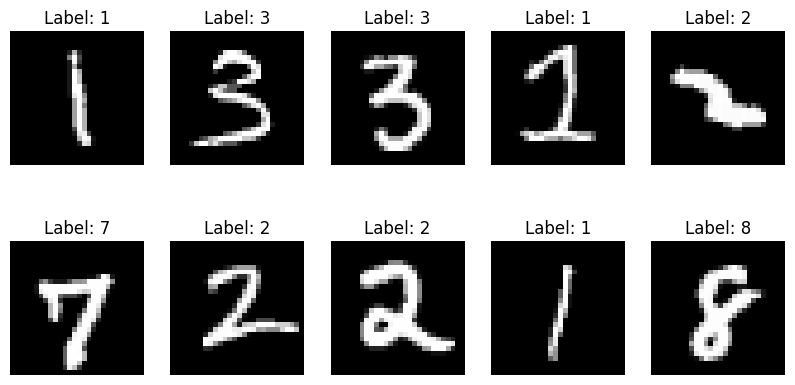

2025-03-18 16:30:22.614015: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
for batch_images, batch_labels in ds_train.take(1):

    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(batch_images[i], cmap='gray')
        plt.title(f'Label: {batch_labels[i]}')
        plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


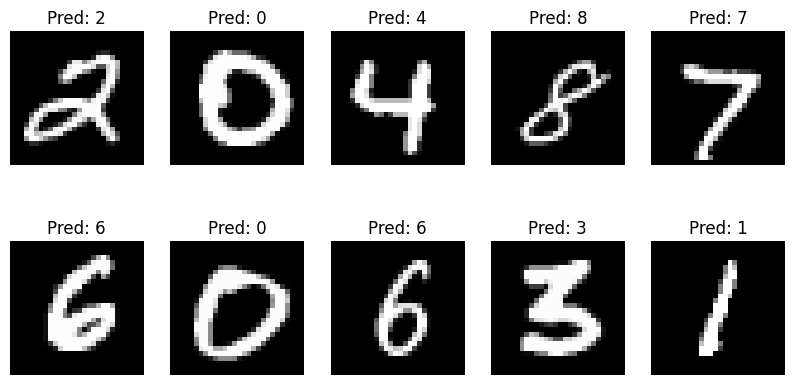

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


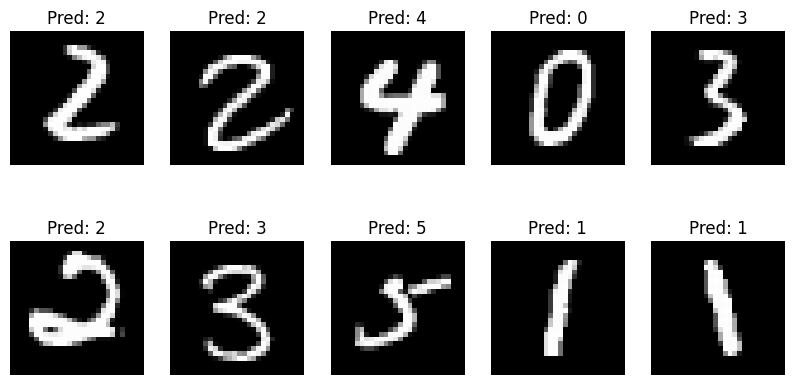

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


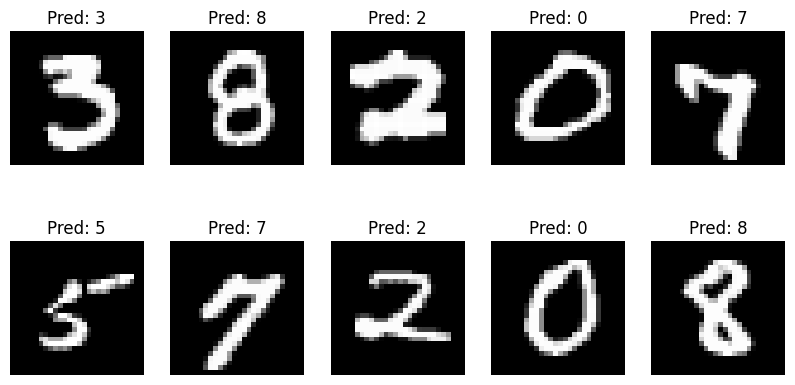

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


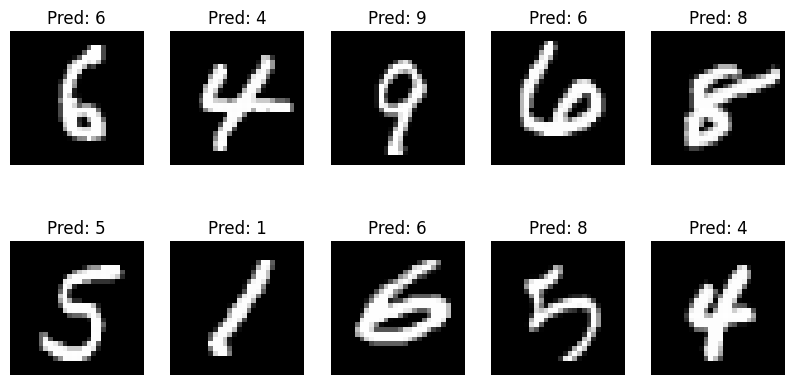

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


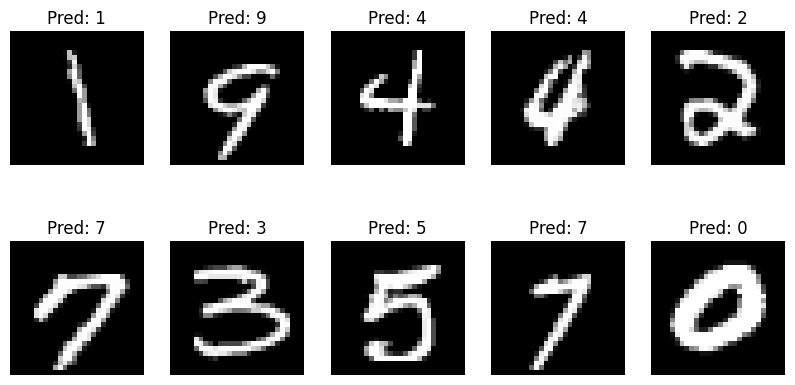

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


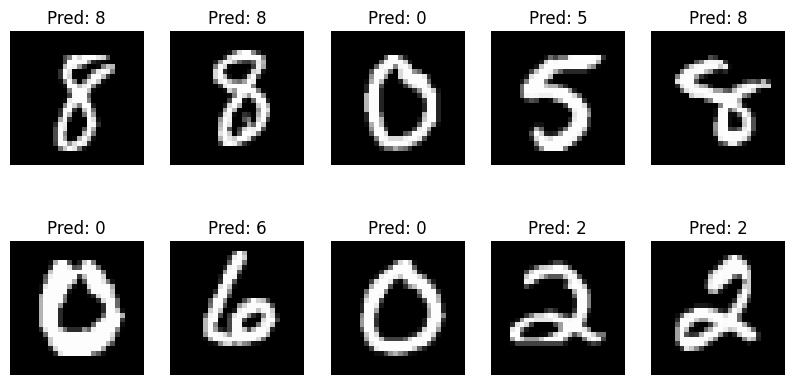

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


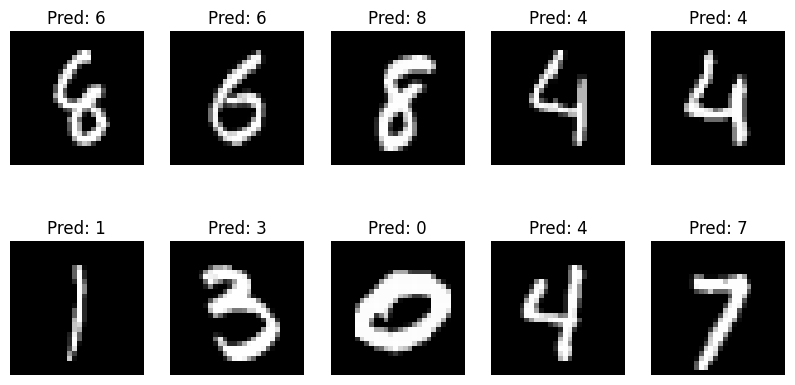

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


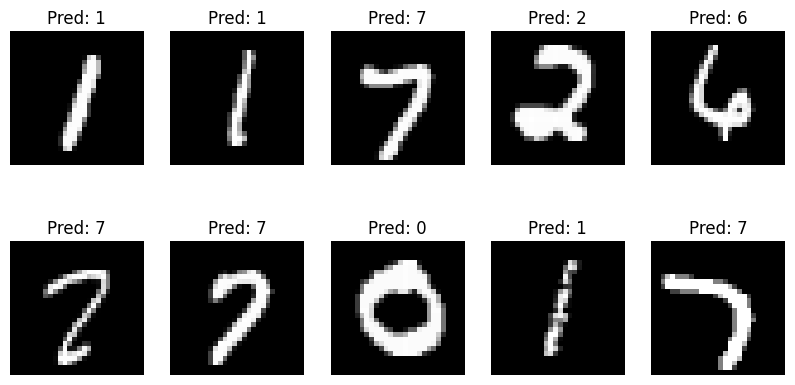

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


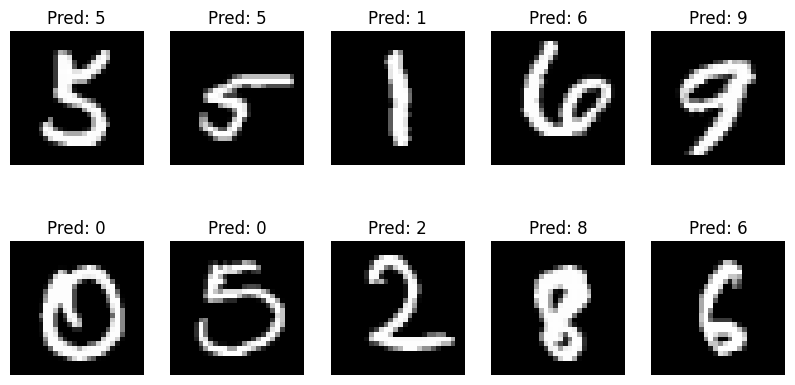

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


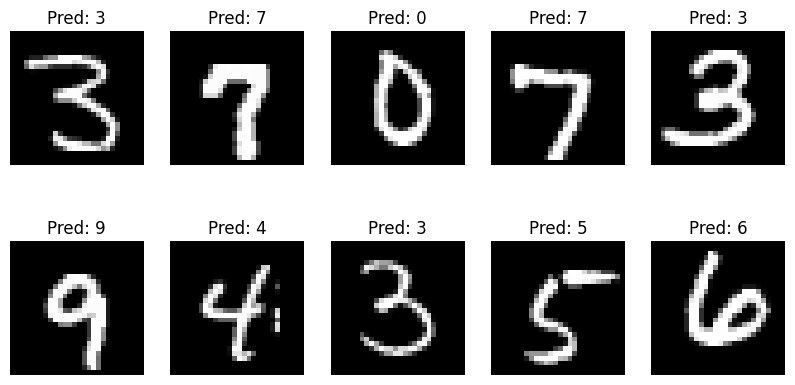

In [13]:
for batch_images, batch_labels in ds_test.take(10):

    predictions = model.predict(batch_images[:10])

    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(batch_images[i], cmap='gray')
        plt.title(f'Pred: {np.argmax(predictions[i])}')
        plt.axis('off')
    plt.show()

## Kuzushiji-MNIST 

K-MNIST :   
Kuzushiji-MNIST est un remplacement de l'ensemble de données MNIST (niveaux de gris 28x28, 70 000 images), fourni au format MNIST d'origine ainsi qu'au format NumPy.   
      
Valeurs dataset K-MNIST :     
![title](dict/kmnist.png)

In [14]:
(ds_train, ds_test), ds_info = tfds.load(
    'kmnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 4/4 [00:33<00:00,  8.43s/ url]


Dataset kmnist downloaded and prepared to /home/ornellah/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.


In [15]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)


In [16]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)


In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)
type(ds_train)
model.fit(
    ds_train,
    epochs=1,
    validation_data=ds_test
)


469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.7887 - sparse_categorical_accuracy: 0.7637 - val_loss: 0.6441 - val_sparse_categorical_accuracy: 0.8012


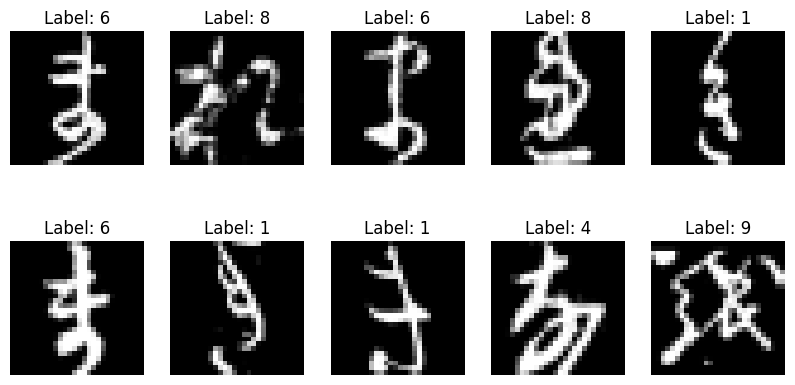

2025-03-18 16:37:59.099835: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [18]:
for batch_images, batch_labels in ds_train.take(1):

    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(batch_images[i], cmap='gray')
        plt.title(f'Label: {batch_labels[i]}')
        plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


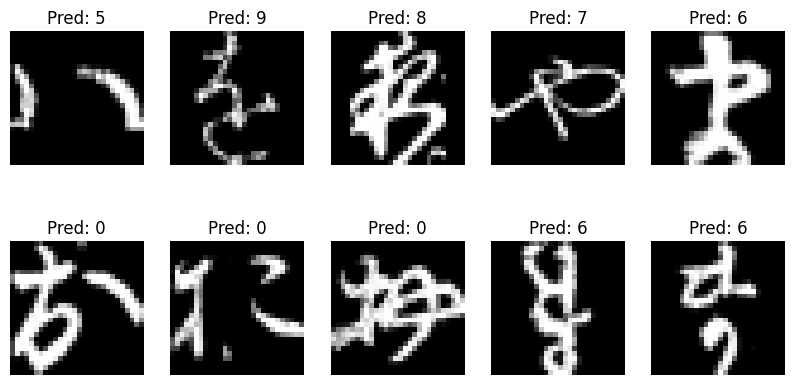

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


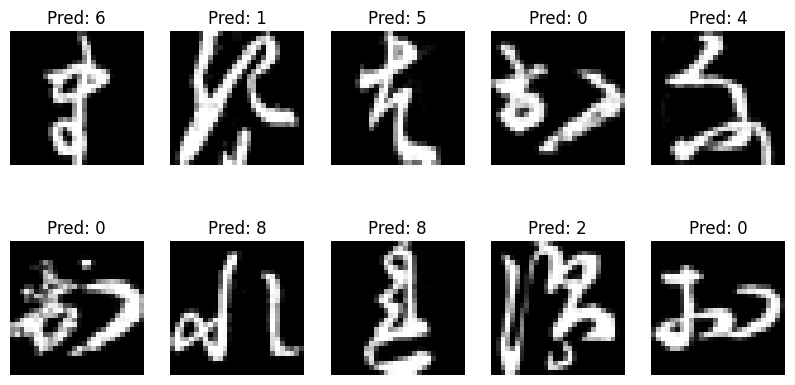

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


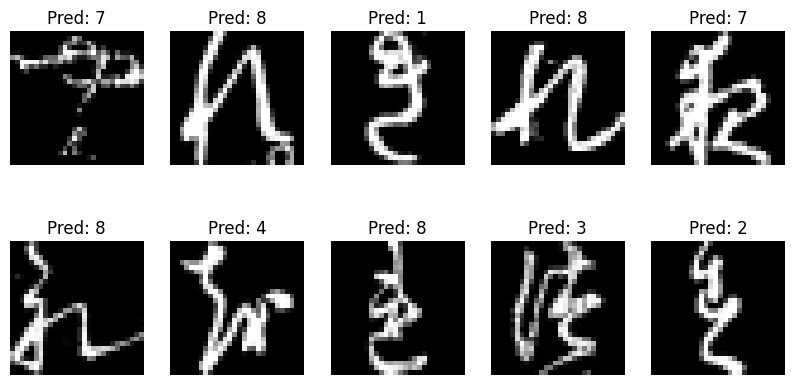

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


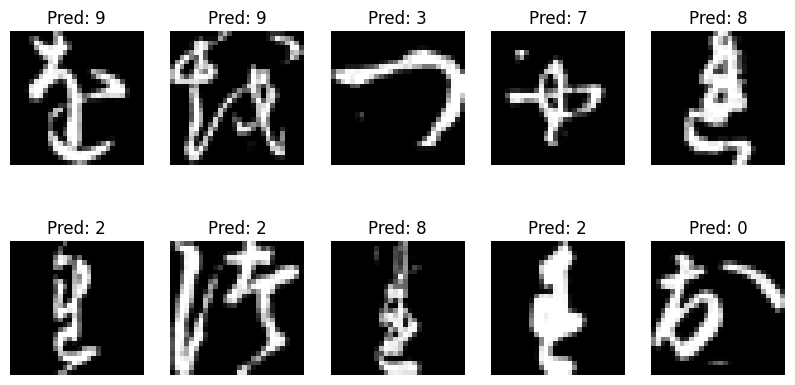

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


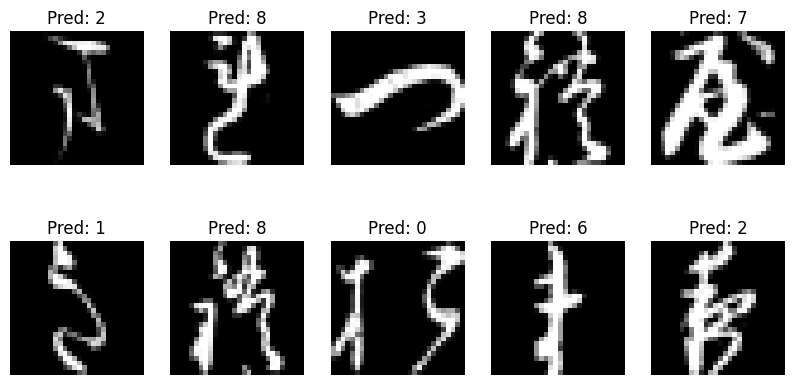

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


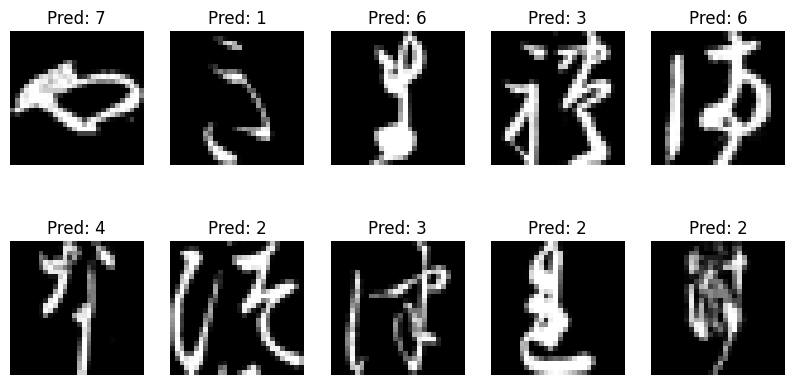

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


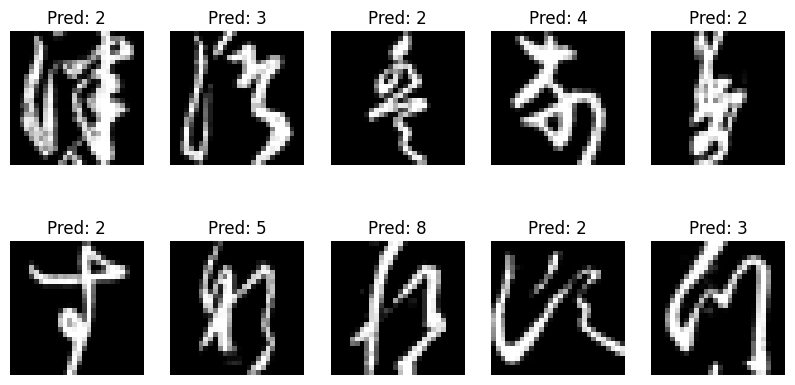

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


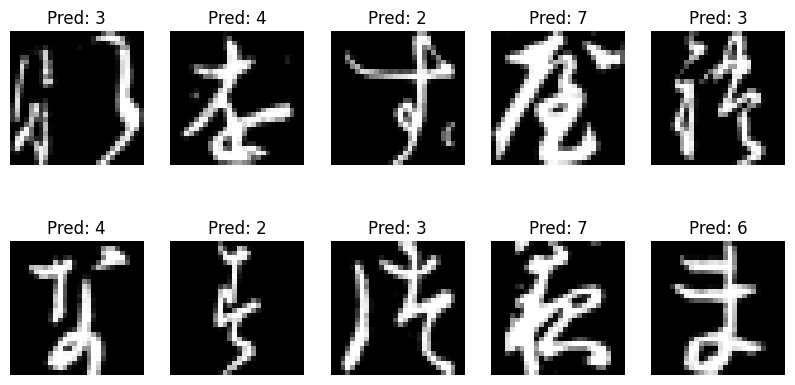

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


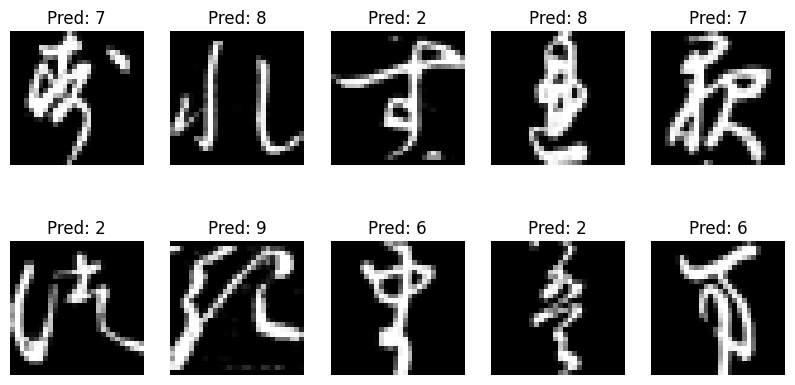

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


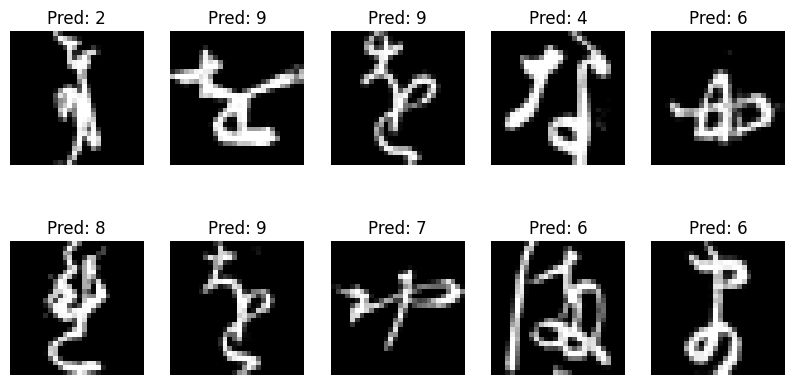

In [19]:
for batch_images, batch_labels in ds_test.take(10):

    predictions = model.predict(batch_images[:10])

    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(batch_images[i], cmap='gray')
        plt.title(f'Pred: {np.argmax(predictions[i])}')
        plt.axis('off')
    plt.show()